<a href="https://colab.research.google.com/github/kavyakamath/kavyakamath/blob/main/MLTask_iGnosisTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-a335f9b53d29>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="TOT_SALES", y="PROD_NAME", palette="Blues_r")


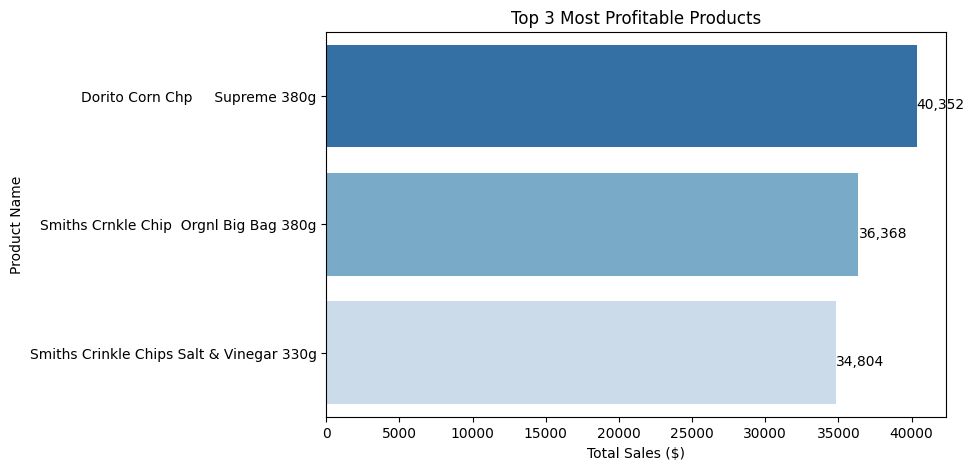

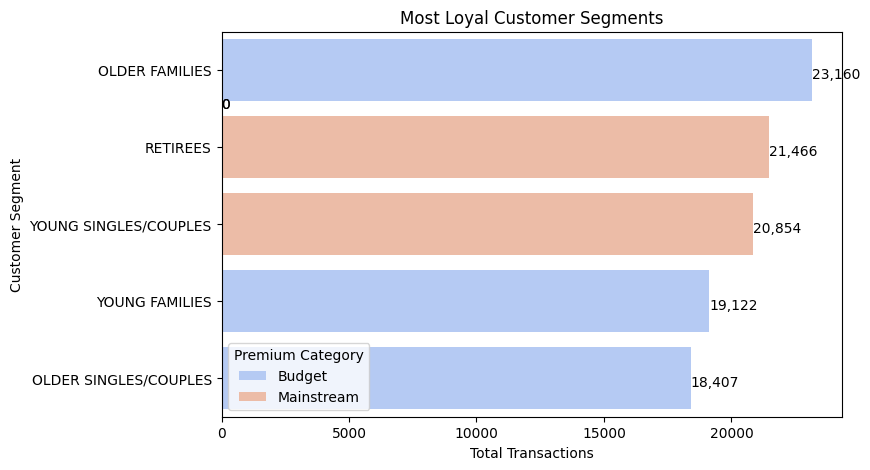

Top 3 Profitable Products:
     PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Most Loyal Customer Segment:
                 LIFESTAGE PREMIUM_CUSTOMER  NUM_TRANSACTIONS
6          OLDER FAMILIES           Budget             23160
13               RETIREES       Mainstream             21466
19  YOUNG SINGLES/COUPLES       Mainstream             20854
15         YOUNG FAMILIES           Budget             19122
9   OLDER SINGLES/COUPLES           Budget             18407


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaction_df = pd.read_csv("transaction_data.csv")
purchase_df = pd.read_csv("purchase_behaviour.csv")


def get_top_profitable_products(df, n=3):
    product_sales = df.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"].sum().reset_index()
    return product_sales.nlargest(n, "TOT_SALES")  # More efficient than sorting


def get_loyal_customers(df, customer_df):
    loyal_customers = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
    loyal_customers.columns = ["LYLTY_CARD_NBR", "NUM_TRANSACTIONS"]


    loyal_customers = loyal_customers.merge(customer_df, on="LYLTY_CARD_NBR", how="left")


    loyal_segment = (
        loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["NUM_TRANSACTIONS"]
        .sum()
        .reset_index()
        .nlargest(5, "NUM_TRANSACTIONS")  # Top 5 instead of sorting
    )

    return loyal_segment


def plot_top_products(df):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=df, x="TOT_SALES", y="PROD_NAME", palette="Blues_r")

    for p in ax.patches:
        ax.annotate(f"{p.get_width():,.0f}", (p.get_width(), p.get_y() + 0.5), ha="left")

    plt.xlabel("Total Sales ($)")
    plt.ylabel("Product Name")
    plt.title("Top 3 Most Profitable Products")
    plt.show()


def plot_loyal_customers(df):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="NUM_TRANSACTIONS",
        y="LIFESTAGE",
        hue="PREMIUM_CUSTOMER",
        palette="coolwarm"
    )


    for p in ax.patches:
        ax.annotate(f"{p.get_width():,.0f}", (p.get_width(), p.get_y() + 0.5), ha="left")

    plt.xlabel("Total Transactions")
    plt.ylabel("Customer Segment")
    plt.title("Most Loyal Customer Segments")
    plt.legend(title="Premium Category")
    plt.show()


top_products = get_top_profitable_products(transaction_df)
top_loyal_segment = get_loyal_customers(transaction_df, purchase_df)

plot_top_products(top_products)
plot_loyal_customers(top_loyal_segment)

print("Top 3 Profitable Products:\n", top_products)
print("\nMost Loyal Customer Segment:\n", top_loyal_segment)
